In [58]:
# read data
import pandas as pd
df=pd.read_csv('swallows.txt', header=0, sep='\s+')

In [59]:
# Drop bird identifier
df=df.drop(['Bird'], axis=1)

In [60]:
df.head()

,Type,Vent,O2,CO2
0,0,-49,19,0.0
1,0,0,19,0.0
2,0,-98,19,0.0
3,0,148,19,0.0
4,0,49,19,0.0


# Benchmark Model

In [82]:
# We are trying to use Type, O2, CO2 to predict Vent of swallows
# Let's create a simple benchmark model: just fit a multiple linear regression
import statsmodels.api as sm
X=df[['Type', 'O2', 'CO2']]
Y=df[['Vent']]
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   Vent   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     28.72
Date:                Tue, 23 Feb 2021   Prob (F-statistic):           7.22e-16
Time:                        14:57:41   Log-Likelihood:                -1564.0
No. Observations:                 240   AIC:                             3136.
Df Residuals:                     236   BIC:                             3150.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        136.7675     79.334      1.724      0.0

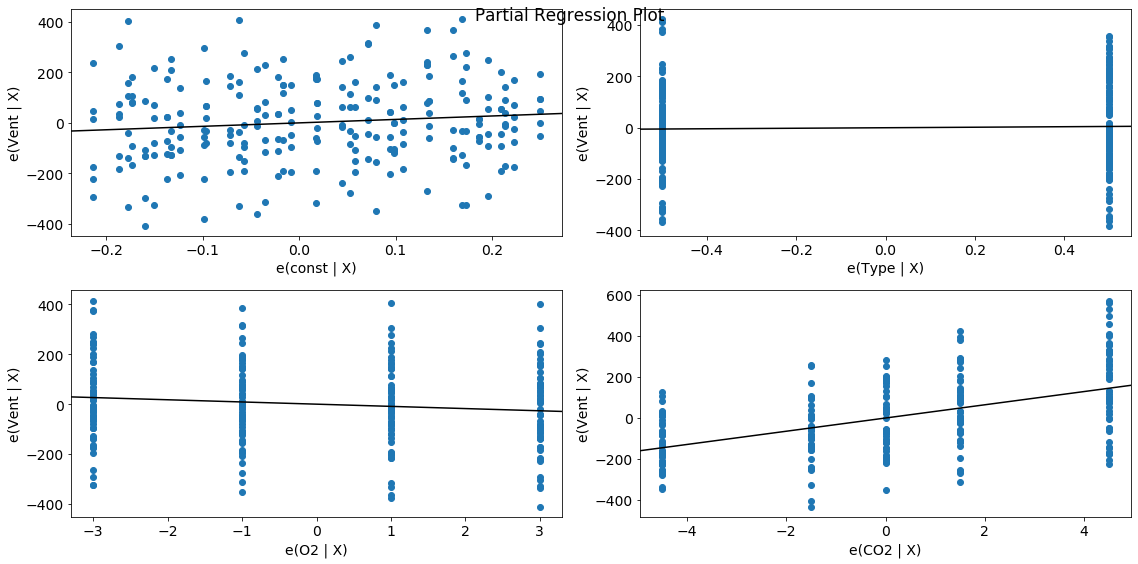

In [83]:
plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)
fig = sm.graphics.plot_partregress_grid(model)
fig.tight_layout(pad=1.0)

# Add Interationc Terms

In [66]:
# The benchmark linear regression model does not perform very well. Let's add the interaction terms to see if any improvements

In [89]:
# Option 1: We could use statsmodels formula
import statsmodels.formula.api as smf
f='Vent ~ Type + O2 + CO2 + Type*O2 + Type*CO2 + O2*CO2'
model_inter=smf.ols(formula=f, data=df).fit()

In [90]:
print(model_inter.summary())

                            OLS Regression Results                            
Dep. Variable:                   Vent   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     14.51
Date:                Tue, 23 Feb 2021   Prob (F-statistic):           4.64e-14
Time:                        15:56:43   Log-Likelihood:                -1563.3
No. Observations:                 240   AIC:                             3141.
Df Residuals:                     233   BIC:                             3165.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.3992    160.007     -0.115      0.9

In [ ]:
# Note that the P-values for each of the interaction parameters, β12, β13, and β23 are quite large, 
# suggesting there is little evidence for two-way interactions between type of bird, oxygen level, and carbon dioxide level.

In [92]:
# Option 2: We could also use sklearn to fit a poynomial model with interaction only
# Load libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import warnings

# Suppress Warning
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_inter=interaction.fit_transform(X)
# Create linear regression
regr=LinearRegression()
# Fit the linear regression
model_inter=regr.fit(X_inter, Y)

In [94]:
# Print model summary metrics

# R-Square
r_sq_2 = model_inter.score(X_inter, Y)
print('coefficient of determination:', r_sq_2)
# Splope and Intercept
print('intercept:', model_inter.intercept_)
print('slope:', model_inter.coef_)

coefficient of determination: 0.2720489128055169
intercept: [-18.39916667]
slope: [[ 0.         55.82916667  0.594375   27.14027778 55.82916667  0.594375
  27.14027778 -7.00833333  2.31111111 -1.44861111]]
